In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Explore categorical variables
print(df['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [8]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [9]:
# Convert specific categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['Attrition', 'Gender', 'Department', 'EducationField', 'MaritalStatus', 'JobRole',
                        'BusinessTravel', 'Over18', 'OverTime']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
# Identify the data types of columns
column_data_types = df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 35 Numerical Columns in dataset
There are 0 Categorical Columns in dataset


In [11]:
#Checking if There's Any Duplicate Records
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  0


In [12]:
#Descriptive Analysis
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.16,0.37,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.61,0.67,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.26,0.53,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.25,1.33,0.0,1.00,2.0,3.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0


In [13]:
# Define features and target variable
X = df.drop(['Attrition'], axis=1)  # Features
y = df['Attrition']  # Target variable (1 if the employee left, 0 otherwise)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



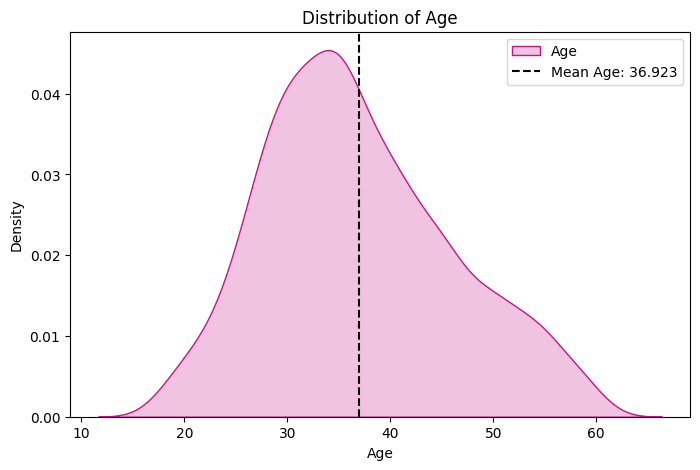

In [17]:
plt.figure(figsize=(8, 5))
sns.kdeplot(x=df['Age'], color='MediumVioletRed', fill=True, label='Age')
plt.axvline(x=df['Age'].mean(), color='k', linestyle="--", label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

Confusion Matrix:
[[251   4]
 [ 35   4]]


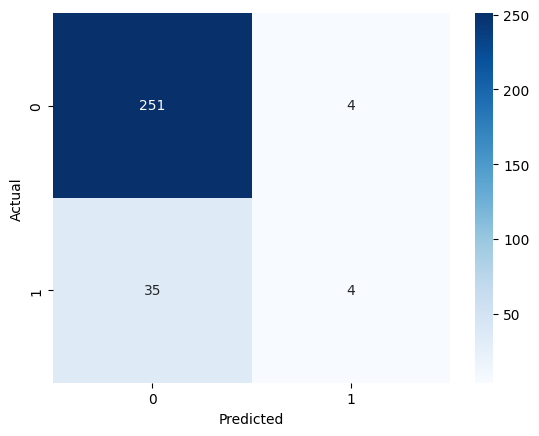

In [18]:
# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: xlabel='JobSatisfaction', ylabel='count'>

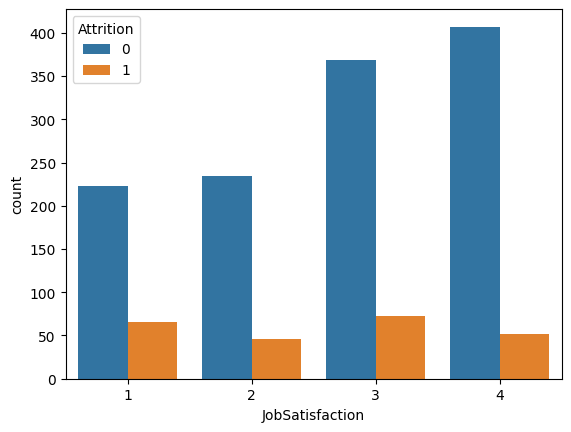

In [21]:
sns.countplot(df, x='JobSatisfaction', hue='Attrition')

<Axes: title={'center': 'Count of Attrition by Job Level'}, xlabel='JobLevel', ylabel='count'>

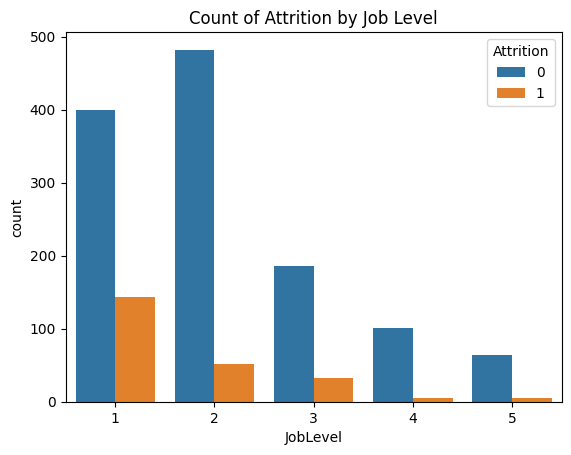

In [22]:
plt.title('Count of Attrition by Job Level')
sns.countplot(df, x='JobLevel', hue='Attrition')

<Axes: title={'center': 'Count of Attrition by Gender'}, xlabel='Gender', ylabel='count'>

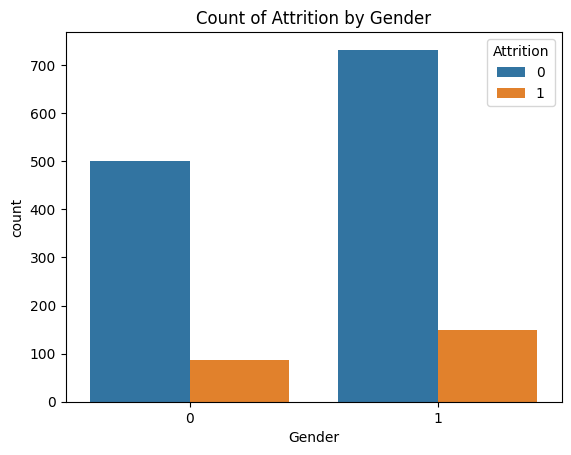

In [23]:
plt.title('Count of Attrition by Gender')
sns.countplot(df, x='Gender', hue='Attrition')

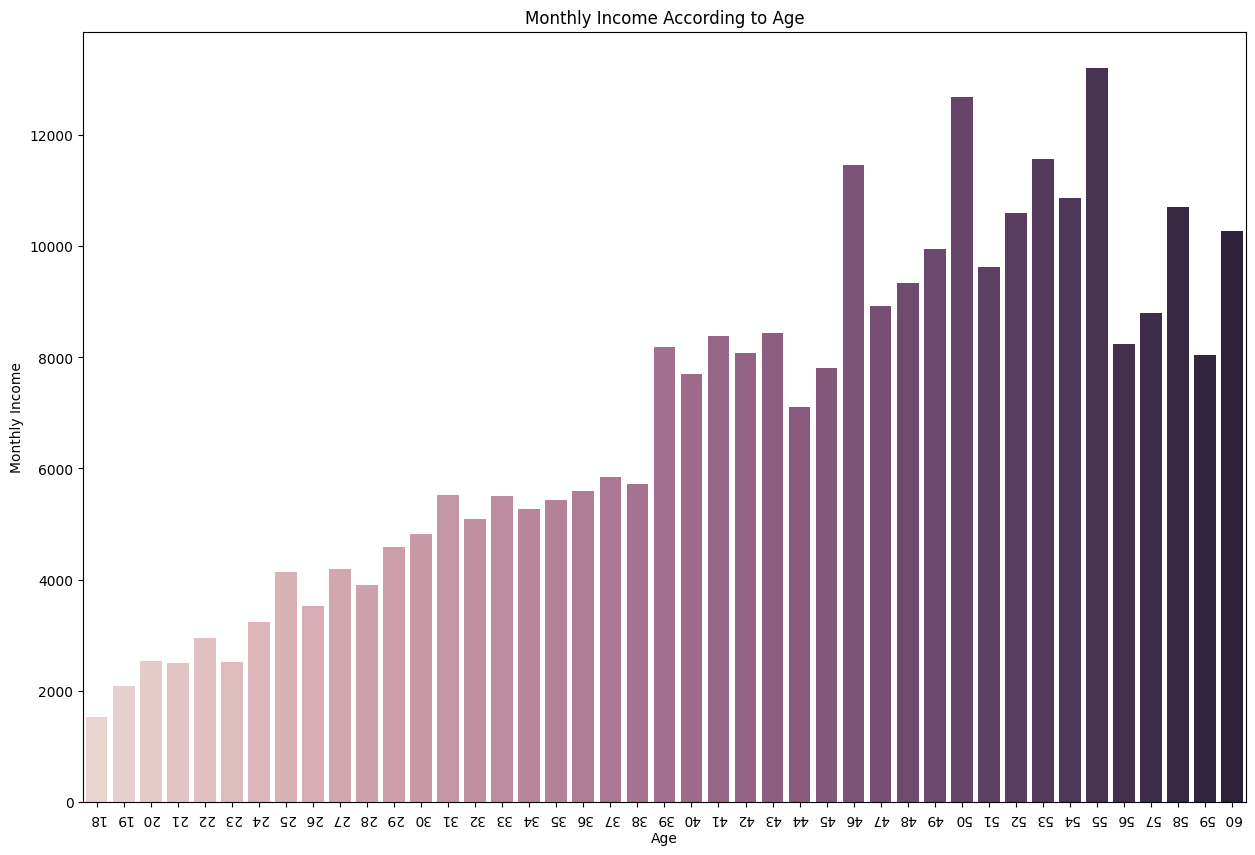

In [32]:
age=pd.DataFrame(df.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age["Count"]=df.Age.value_counts(dropna=False)
age.reset_index(level=0, inplace=True)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

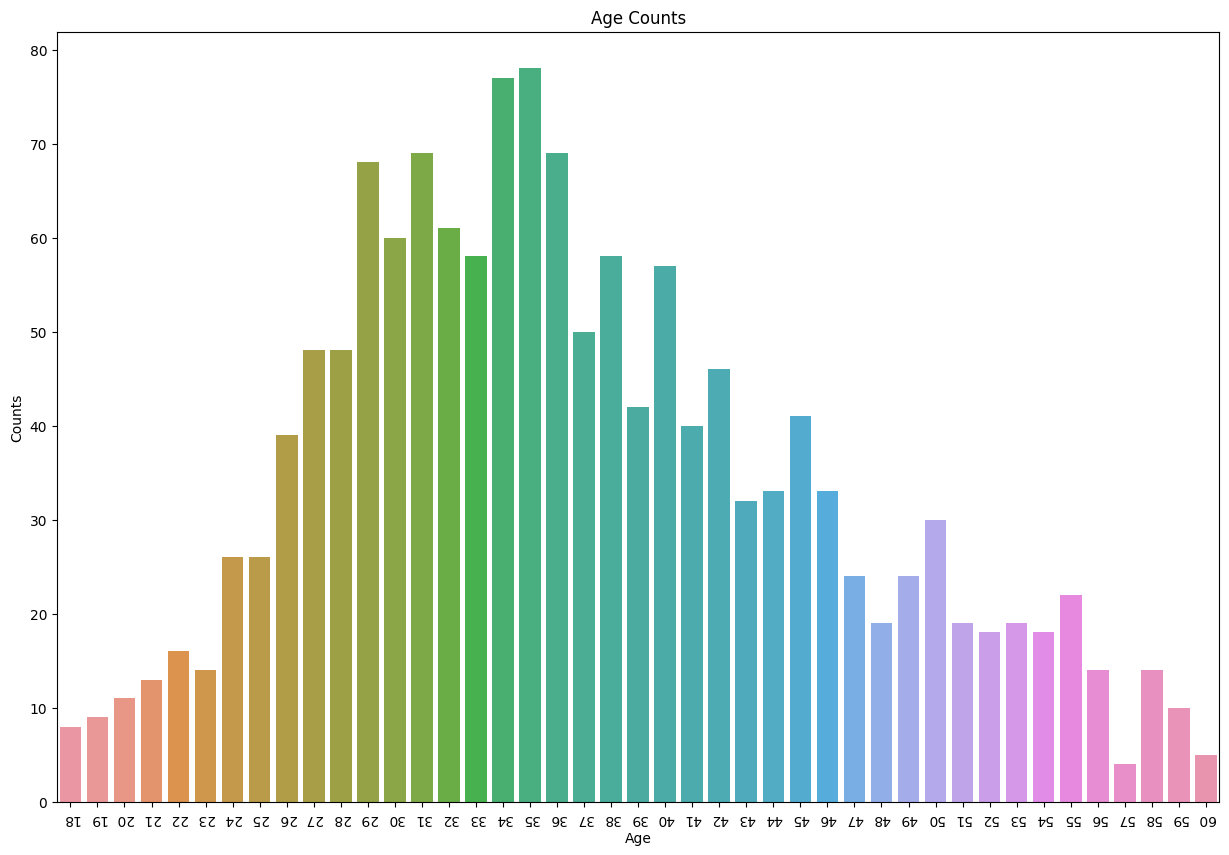

In [33]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

<Axes: >

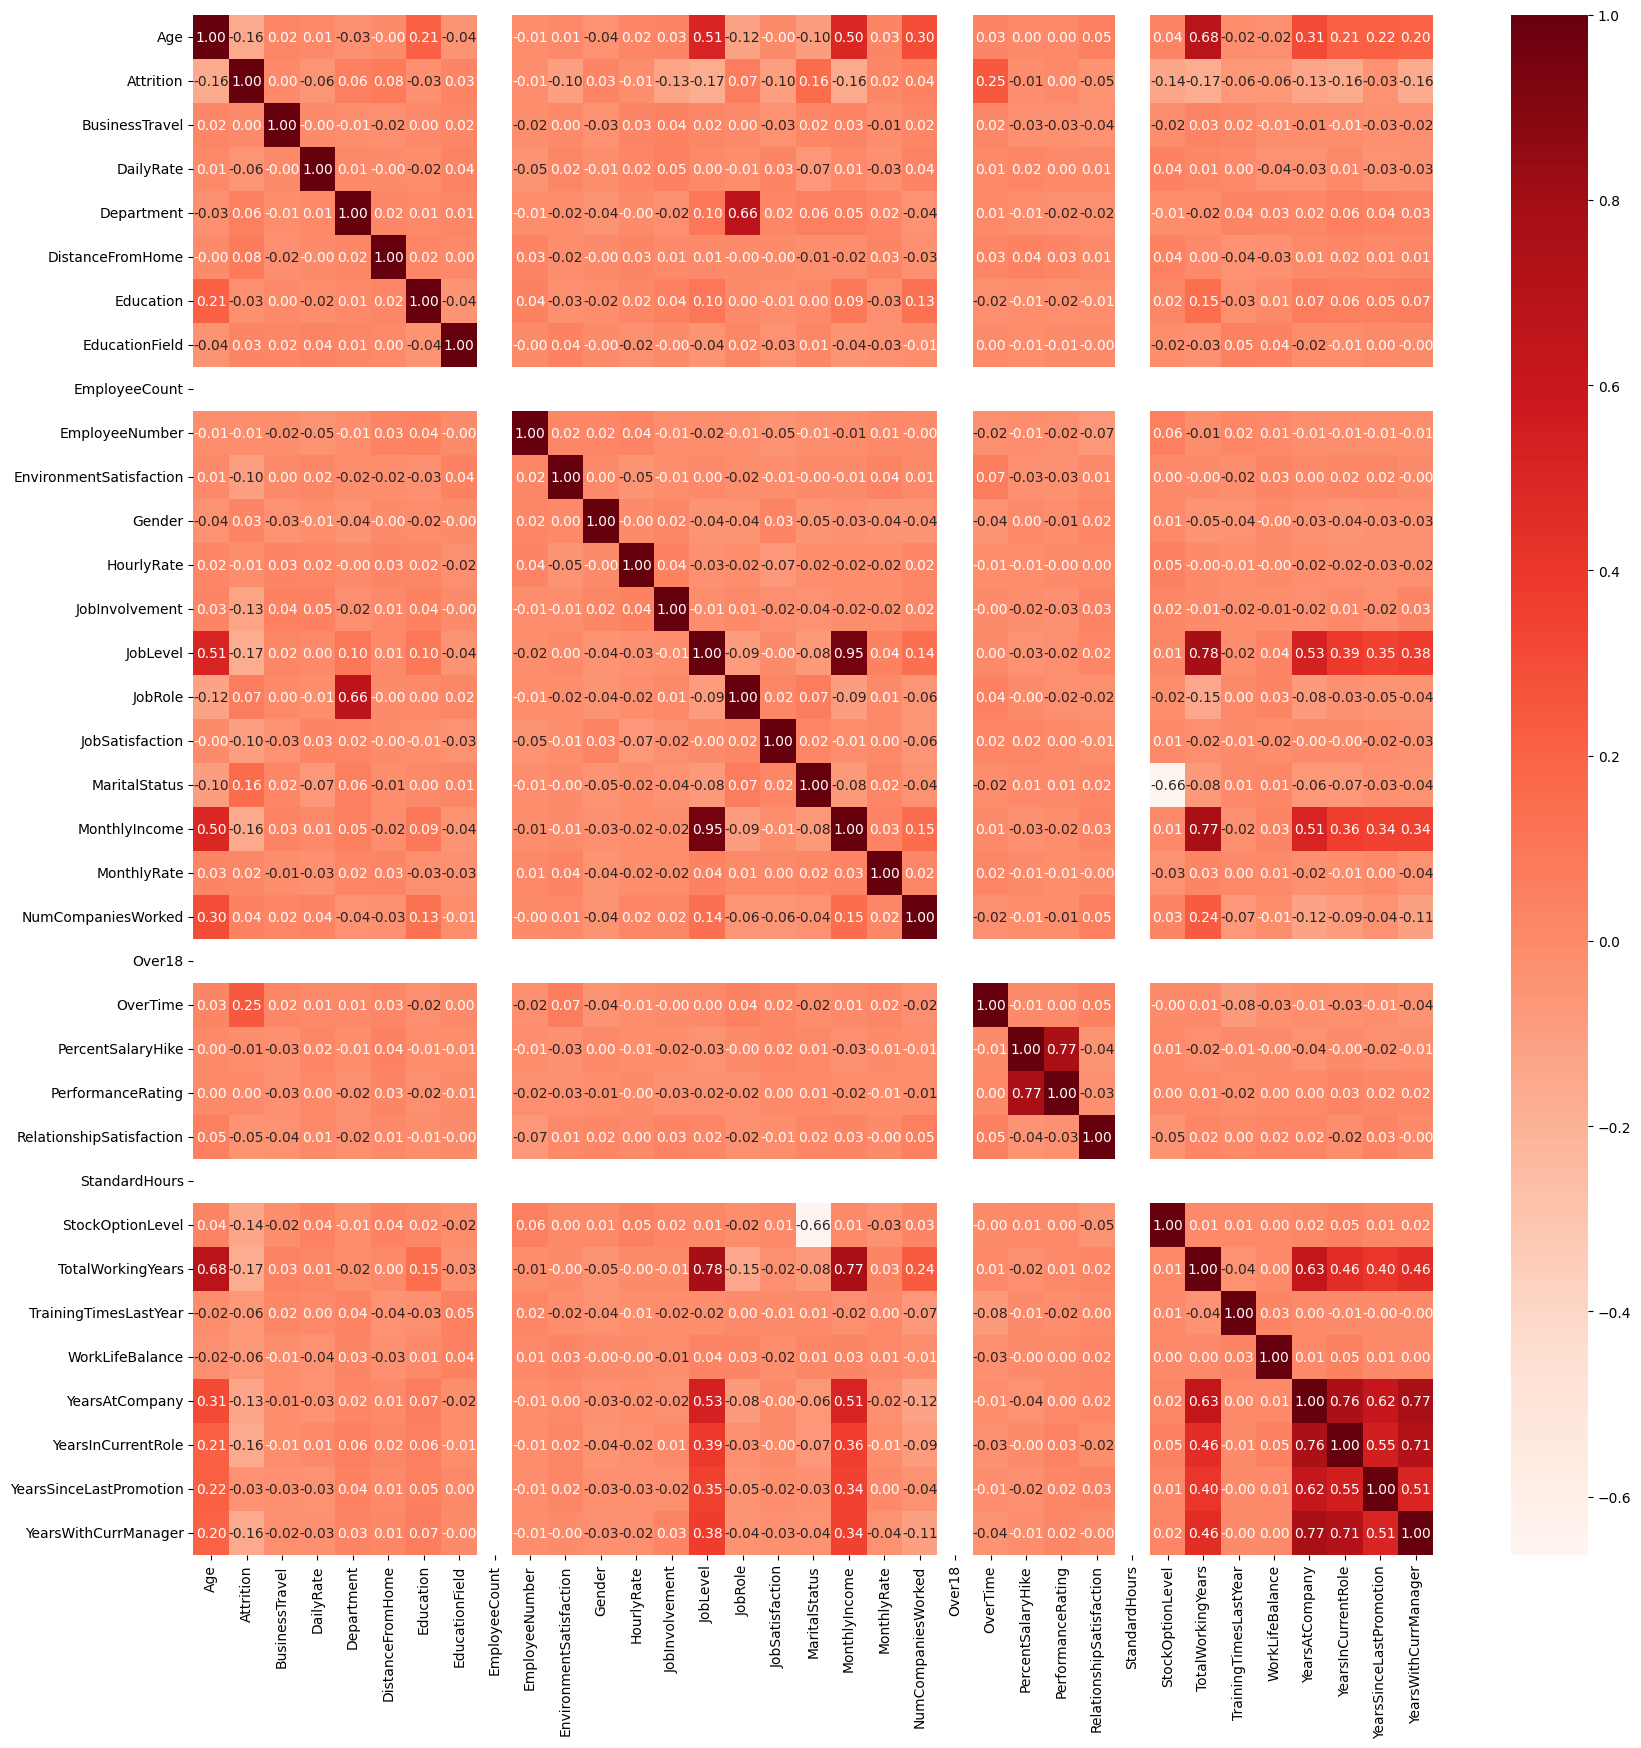

In [40]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')